In [1]:
import sys

import numpy as np
import matplotlib.pyplot as plt
import json 

sys.path.append("..")

In [2]:
from src.mcmc import decode_MCMC_heat, decode_MCMC, cross_validation
from src.cipher_utils import create_encryption_dict, encode

In [3]:
text = "Whiskers was no ordinary cat he believed he was a pirate. Each morning, he climbed the tallest shelf in the house, meowed like a captain, and batted down anything in his path. One day, he discovered a crumpled treasure map under the rug. Tail high, he followed it through the garden, under the fence, and into the neighbors shed. There, among dusty boxes, he found his prize: a forgotten box of tuna. He purred victoriously, the fearless feline captain of Tuna Island.".lower()

In [4]:
with open("../data/en_perc_dict.json") as file:
    perc_dict = json.load(file)

encryption_dict = create_encryption_dict()
encoded_text = encode(text, encryption_dict)

In [5]:
plan = [np.log(k + 1) + 100 for k in range(1000)]
len(plan)

1000

In [6]:
decode_MCMC_heat(text, perc_dict, plan, repeat=2)[2], 

([',o?5.mp5a,l5auiaipj?ulpgaelraomakm2?mymjaoma,l5alaf?plrmbamleoadipu?u0haomae2?dkmjaromarl22m5ra5om2ta?uaromaoi15mhadmi,mja2?.malaelfrl?uhalujaklrrmjaji,ualugro?u0a?uao?5aflrobaiumajlghaomaj?5eiympmjalaep1df2mjarpml51pmadlfa1ujmparomap10barl?2ao?0ohaomati22i,mja?raropi10oaroma0lpjmuha1ujmparomatmuemhaluja?uriaromaum?0okip5a5omjbarompmhaldiu0aj15rgakixm5haomati1ujao?5afp?9mvalatip0irrmuakixaitar1ulbaomaf1ppmjay?erip?i152gharomatmlp2m55atm2?umaelfrl?uaitar1ula?52lujb',
  'znofj ifazefalsasicoleiyateran ag bo x can azefaeadoier ka etna.silolphan atbo.g carn arebb frafn bmaolarn ansuf ha. sz caboj aeatedreolhaelcagerr cacszlaelyrnolpaolanofadernkasl aceyhan acoftsx i caeatiu.db cari efui a.edaulc iarn aiupkareobanopnhan amsbbsz caorarnisupnarn apeic lhaulc iarn am lt haelcaolrsarn al opngsifafn ckarn i hae.slpacufryagsv fhan amsulcanofadio! ;aeamsipsrr lagsvasmarulekan aduii caxotrsiosufbyharn am eib ffam bol atedreolasmaruleaofbelck',
  '.sag; igo.egonlolitaneiyoweros ok ma x tos o.egoe

In [12]:
n = 5000
plans = [[np.log(k + 1) + 10 for k in range(n)], [k/10 for k in range(n)], [1.001**k for k in range(n)]]
rep = 2
iters = n*rep
attempts = 50
labels = ["Logarithmic", "Linear", "Exponential"]

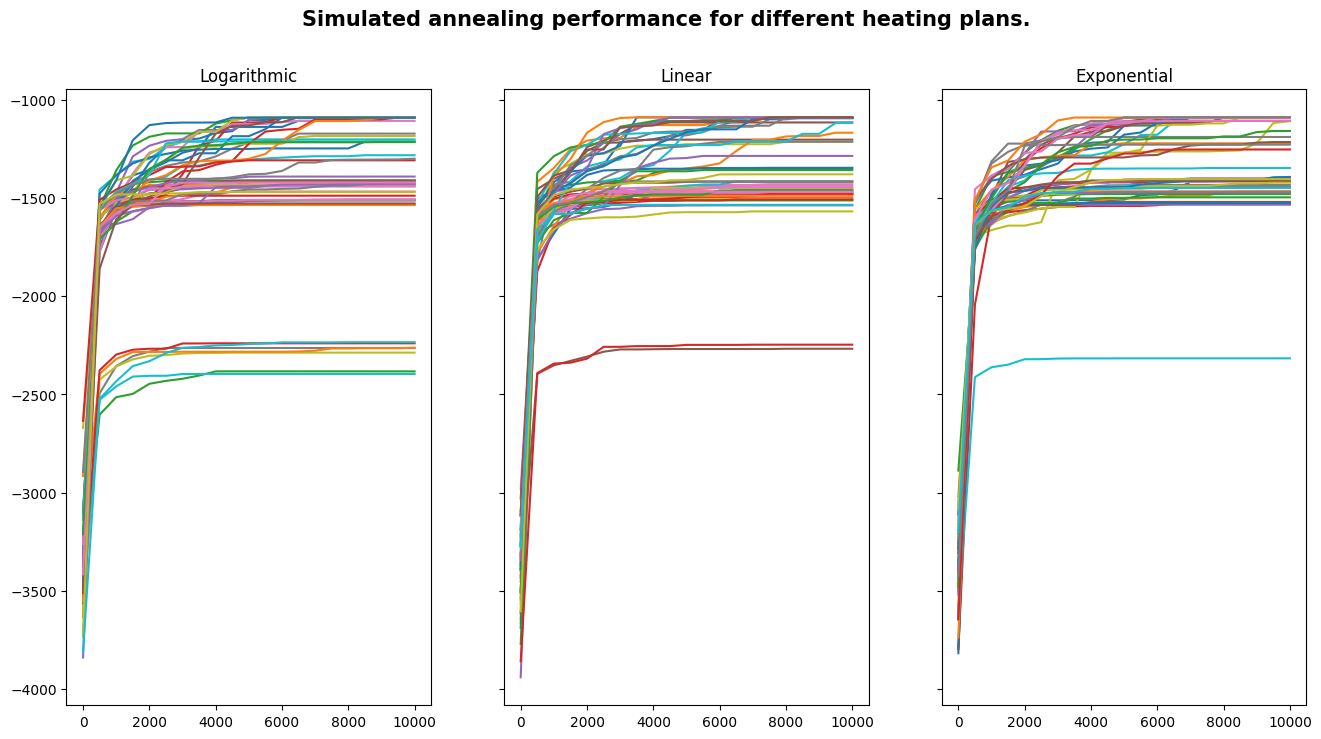

In [13]:
fig, ax = plt.subplots(1, 3, figsize=(16, 8), sharey=True)
fig.suptitle("Simulated annealing performance for different heating plans.", fontsize=15, fontweight="bold")
for i, plan in enumerate(plans):
    _, scores = cross_validation(attempts, text, perc_dict, 1, "annealing", heating_plan=plan, repeat=rep)
    for l in range(len(scores)):
        ax[i].plot(list(range(0, iters+1, 500)), scores[l])
    ax[i].set_title(labels[i])

In [ ]:
# TODO comparison of annealing with just metropolis